In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyproj as pj
import halfspace.load as hs
import halfspace.projections as hsp
import halfspace.sandbox as hbx
import scipy.ndimage as nd
import h5py
import json

In [3]:
isc_file = '../data/fault_data/fms/isc_catalog.csv'

eq_df = pd.read_csv(isc_file, skipinitialspace=True, skiprows=13)

In [4]:
eq_df.head()

,EVENT_ID,AUTHOR,DATE,TIME,LAT,LON,DEPTH,CENTROID,AUTHOR .1,EX,...,EX.2,T_VAL,T_PL,T_AZM,P_VAL,P_PL,P_AZM,N_VAL,N_PL,N_AZM
0,665385,NEIS,1979-05-20,22:59:14.20,30.029,80.310,33,NaN,HRVD,17,...,17,5.16,52,16,-5.59,38,194,0.42,1,285
1,663769,NEIS,1979-06-19,16:29:11.60,26.741,87.506,24,NaN,HRVD,16,...,16,3.72,11,84,-3.97,78,243,0.25,4,353
2,651572,NEIS,1980-02-22,03:02:47.20,30.506,88.583,33,NaN,HRVD,18,...,18,4.41,6,273,-3.58,83,62,-0.83,4,183
3,644075,NEIS,1980-06-22,14:38:53.70,30.100,81.768,33,NaN,HRVD,16,...,16,5.80,15,270,-4.87,63,31,-0.93,22,174
4,642635,NEIS,1980-07-29,12:23:12.30,29.331,81.258,34,NaN,HRVD,17,...,17,2.16,70,9,-2.31,20,188,0.15,0,278


In [5]:
eq_df.tail()

,EVENT_ID,AUTHOR,DATE,TIME,LAT,LON,DEPTH,CENTROID,AUTHOR .1,EX,...,EX.2,T_VAL,T_PL,T_AZM,P_VAL,P_PL,P_AZM,N_VAL,N_PL,N_AZM
132,601456942,GCMT,2012-07-22,16:44:20.40,29.93,88.32,24.8,TRUE,GCMT,16,...,16,3.407,20,79,-4.075,61,209,0.670,21,341
133,601614687,GCMT,2012-08-23,16:30:22.80,28.05,82.65,28.9,TRUE,GCMT,16,...,16,3.429,66,16,-3.686,24,207,0.256,4,116
134,601777961,GCMT,2012-10-02,18:37:38.70,26.78,92.95,35.5,TRUE,GCMT,16,...,16,2.389,55,297,-2.648,2,29,0.256,35,121
135,603157284,GCMT,2013-06-28,11:40:50.40,28.49,82.18,18.2,TRUE,GCMT,16,...,16,3.633,70,13,-4.057,19,200,0.421,2,110
136,STOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
eq_df = eq_df.iloc[:135,:]

In [7]:
eq_df.tail()

,EVENT_ID,AUTHOR,DATE,TIME,LAT,LON,DEPTH,CENTROID,AUTHOR .1,EX,...,EX.2,T_VAL,T_PL,T_AZM,P_VAL,P_PL,P_AZM,N_VAL,N_PL,N_AZM
130,601273351,NEIC,2012-07-14,19:55:17.95,25.424,94.48,52.1,NaN,NEIC,16,...,16,7.240,22,105,-6.120,2,195,-1.120,68,290
131,601273351,GCMT,2012-07-14,19:55:18.00,25.400,94.45,41.1,TRUE,GCMT,17,...,17,1.165,23,114,-1.119,7,207,-0.046,66,315
132,601456942,GCMT,2012-07-22,16:44:20.40,29.930,88.32,24.8,TRUE,GCMT,16,...,16,3.407,20,79,-4.075,61,209,0.670,21,341
133,601614687,GCMT,2012-08-23,16:30:22.80,28.050,82.65,28.9,TRUE,GCMT,16,...,16,3.429,66,16,-3.686,24,207,0.256,4,116
134,601777961,GCMT,2012-10-02,18:37:38.70,26.780,92.95,35.5,TRUE,GCMT,16,...,16,2.389,55,297,-2.648,2,29,0.256,35,121


In [8]:
eq_df.dtypes

EVENT_ID        object
AUTHOR          object
DATE            object
TIME            object
LAT            float64
LON            float64
DEPTH          float64
CENTROID        object
AUTHOR   .1     object
EX             float64
MO             float64
MW             float64
EX.1           float64
MRR            float64
MTT            float64
MPP            float64
MRT            float64
MTP            float64
MPR            float64
STRIKE         float64
DIP            float64
RAKE           float64
STRIKE.1       float64
DIP  .1        float64
RAKE   .1      float64
EX.2           float64
T_VAL          float64
T_PL           float64
T_AZM          float64
P_VAL          float64
P_PL           float64
P_AZM          float64
N_VAL          float64
N_PL           float64
N_AZM          float64
dtype: object

In [9]:
eq_df.columns

Index(['EVENT_ID', 'AUTHOR   ', 'DATE      ', 'TIME       ', 'LAT     ',
       'LON      ', 'DEPTH', 'CENTROID', 'AUTHOR   .1', 'EX', 'MO   ', 'MW  ',
       'EX.1', 'MRR   ', 'MTT   ', 'MPP   ', 'MRT   ', 'MTP   ', 'MPR   ',
       'STRIKE', 'DIP  ', 'RAKE   ', 'STRIKE.1', 'DIP  .1', 'RAKE   .1',
       'EX.2', 'T_VAL ', 'T_PL ', 'T_AZM ', 'P_VAL ', 'P_PL ', 'P_AZM ',
       'N_VAL ', 'N_PL ', 'N_AZM '],
      dtype='object')

In [10]:
eq_df.columns = [col.replace(' ','') for col in eq_df.columns]

eq_df.columns

Index(['EVENT_ID', 'AUTHOR', 'DATE', 'TIME', 'LAT', 'LON', 'DEPTH', 'CENTROID',
       'AUTHOR.1', 'EX', 'MO', 'MW', 'EX.1', 'MRR', 'MTT', 'MPP', 'MRT', 'MTP',
       'MPR', 'STRIKE', 'DIP', 'RAKE', 'STRIKE.1', 'DIP.1', 'RAKE.1', 'EX.2',
       'T_VAL', 'T_PL', 'T_AZM', 'P_VAL', 'P_PL', 'P_AZM', 'N_VAL', 'N_PL',
       'N_AZM'],
      dtype='object')

In [11]:
wgs84 = pj.Proj(init='epsg:4326')
utm45 = pj.Proj(init='epsg:32645')

In [12]:
eq_df['east'], eq_df['north'] = pj.transform(wgs84, utm45,
                                             eq_df.LON.values,
                                             eq_df.LAT.values)

In [36]:
eqs = eq_df[['east', 'north', 'DEPTH', 'EVENT_ID']]

np.random.seed(69)

rnds = np.random.rand(len(eqs.index)) >= 0.5

eqs['strike'], eqs['dip'], eqs['rake'] = (0., 0., 0.)

eqs.loc[rnds, 'strike'] = eq_df.loc[rnds, 'STRIKE']
eqs.loc[rnds, 'dip'] = eq_df.loc[rnds, 'DIP']
eqs.loc[rnds, 'rake'] = eq_df.loc[rnds, 'RAKE']

eqs.loc[~rnds, 'strike'] = eq_df.loc[~rnds, 'STRIKE.1']
eqs.loc[~rnds, 'dip'] = eq_df.loc[~rnds, 'DIP.1']
eqs.loc[~rnds, 'rake'] = eq_df.loc[~rnds, 'RAKE.1']

/Users/itchy/src/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/itchy/src/anaconda/lib/python3.4/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [37]:
eqs.head()

,east,north,DEPTH,EVENT_ID,strike,dip,rake
0,-145783.916307,3340920.485589,33,665385,274,7,79
1,550317.779533,2957849.113062,24,663769,179,34,-82
2,651905.627526,3375921.827987,33,651572,180,51,-95
3,-4458.257140,3341437.570949,33,644075,28,36,-51
4,-57968.139114,3258383.542063,34,642635,98,65,90


In [38]:
#eqs['DEPTH'] *= -1000
eqs.rename(columns={'DEPTH' : 'depth'}, inplace=True)

/Users/itchy/src/anaconda/lib/python3.4/site-packages/pandas/core/frame.py:2524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [39]:
C=6.
Cw = 10.7
mu = 30e9

def calc_Mo_from_M(M, C=C):
    """
    Calculate seismic moment (Mo) from
    moment magnitude (M) given a scaling law.
    C is a scaling constant; should be set at 6,
    but is defined elsewhere in the module so
    that all functions using it share a value.
    """
    term1 = 3/2. * C * (np.log(2) + np.log(5) )
    term2 = 3/2. * M * (np.log(2) + np.log(5) )
    
    Mo = np.exp( term1 + term2)
    
    return Mo


def calc_M_from_Mo(Mo, C=C):
    """
    Calculates moment magnitude (M) from seismic moment (Mo)
    given a scaling law.
    C is a scaling constant; should be set at 6,
    but is defined elsewhere in the module so
    that all functions using it share a value.
    """
    return (2/3.) * np.log10(Mo) - C


def calc_Mw_from_Mo(Mo, Cw=Cw):
    
    return (2/3.) * np.log10(Mo) - Cw

def calc_Mo_from_Mw(Mw, Cw=Cw):
    
    return 10**(3/2. * (Mw + Cw))


def calc_Mo_from_fault_params(L1=None, L2=None, z=None, dip=None, mu=mu, D=None,
                              area_dim='km', slip_dim='m', dip_dim='degrees'):
    """
    Calculates the seismic moment Mo (in N m) from fault dimensions,
    shear modulus mu, and mean slip distance.
    Is currently set up to convert from typical dimensions to meters and
    radians; units other than distances in km, slip (D) in m, and
    dips in degrees should be converted to meters and radians before passing
    to function.
    mu should be set at 3e9 (30 GPa) at the top of the module; but it may
    change.  It is defined elsewhere so that all functions use the same value.
    """
    if area_dim == 'km':
        L1 *= 1000
        L2 *= 1000

    if dip_dim == 'degrees':
        dip = np.radians(dip)

    #return (L * z * mu * D) / np.sin(dip)
    return (L1 * L2 * mu * D )


def calc_Mw_from_fault_params(**kwargs):
    
    Mo = calc_Mo_from_fault_params(**kwargs)
    
    return calc_Mw_from_Mo(Mo)


def calc_eq_slip_from_Mo(Mo, L1=1, L2=1, mu=mu, area_dim='km', slip_dim='m'):
    if area_dim == 'km':
        L1 *= 1000
        L2 *= 1000
        
    return Mo / (L1 * L2 * mu)


def calc_eq_slip_from_Mw(Mw, **kwargs):
    
    Mo = calc_Mo_from_Mw(Mw)
    
    return calc_eq_slip_from_Mo(Mo, **kwargs)


def calc_eq_slip_from_M(M, **kwargs):
    
    Mo = calc_Mo_from_M(M)
    
    return calc_eq_slip_from_Mo(Mo, **kwargs)

In [40]:
calc_eq_slip_from_Mw(6.7, L1=15, L2=20)

13988060.131046234

In [41]:
# scale moment calculations to weighting in finite fault model

ff_moment_1m_patch = calc_M_from_Mo(calc_Mo_from_fault_params(L1=15, L2=20, D=1, dip=15.))

ff_moment_1m_patch

6.636161672959549

In [42]:
calc_Mo_from_fault_params(L1=15, L2=20, D=1, dip=15.)

9e+18

In [43]:
calc_Mw_from_fault_params(L1=15, L2=20, D=1, dip=15.)

1.9361616729595497

In [44]:
calc_eq_slip_from_Mo(calc_Mo_from_fault_params(L1=15, L2=20, D=1, dip=15.),
                     L1=15, L2=20)

1.0

In [45]:
calc_eq_slip_from_Mw(calc_Mw_from_fault_params(L1=15, L2=20, D=1, dip=15.),
                     L1=15, L2=20)

1.0000000000000009

In [46]:
eqs.loc[:,'slip_m'] = calc_eq_slip_from_M(eq_df.MW, L1=15, L2=20)

/Users/itchy/src/anaconda/lib/python3.4/site-packages/pandas/core/indexing.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/itchy/src/anaconda/lib/python3.4/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [47]:
eqs['point_index'] = eq_df.EVENT_ID

/Users/itchy/src/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [48]:
eqs.to_csv('../data/fault_data/fms/all_fms.csv', index=False)

In [49]:
eqs.head()

,east,north,depth,EVENT_ID,strike,dip,rake,slip_m,point_index
0,-145783.916307,3340920.485589,33,665385,274,7,79,0.055687,665385
1,550317.779533,2957849.113062,24,663769,179,34,-82,0.003514,663769
2,651905.627526,3375921.827987,33,651572,180,51,-95,0.313154,651572
3,-4458.257140,3341437.570949,33,644075,28,36,-51,0.004963,644075
4,-57968.139114,3258383.542063,34,642635,98,65,90,0.019759,642635


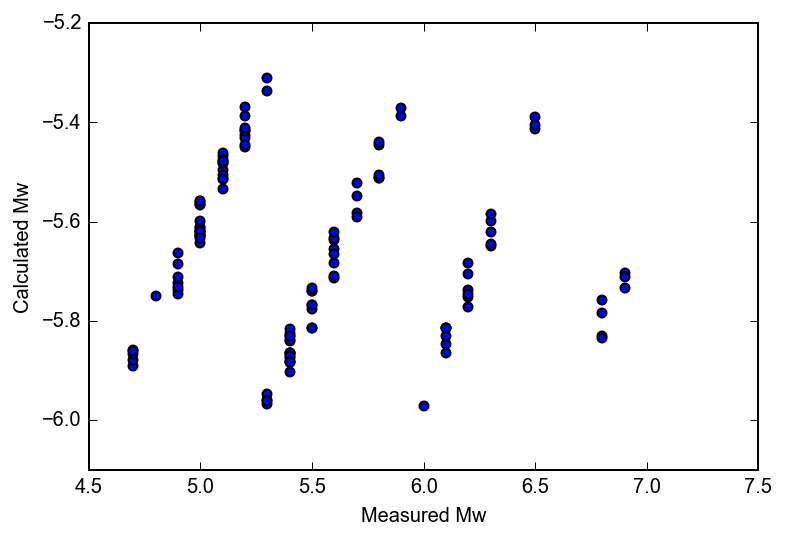

In [50]:
plt.scatter(eq_df.MW, calc_M_from_Mo(eq_df.MO))
plt.xlabel('Measured Mw')
plt.ylabel('Calculated Mw')

plt.show()

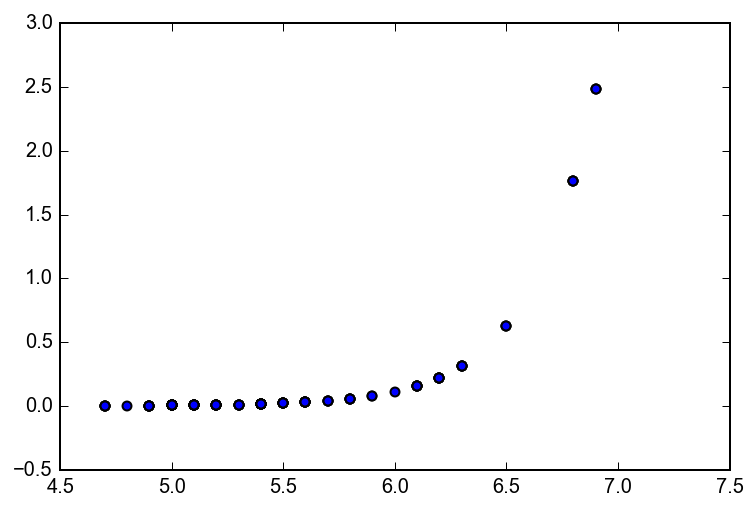

In [51]:
plt.scatter(eq_df.MW, eqs.slip_m)
plt.show()

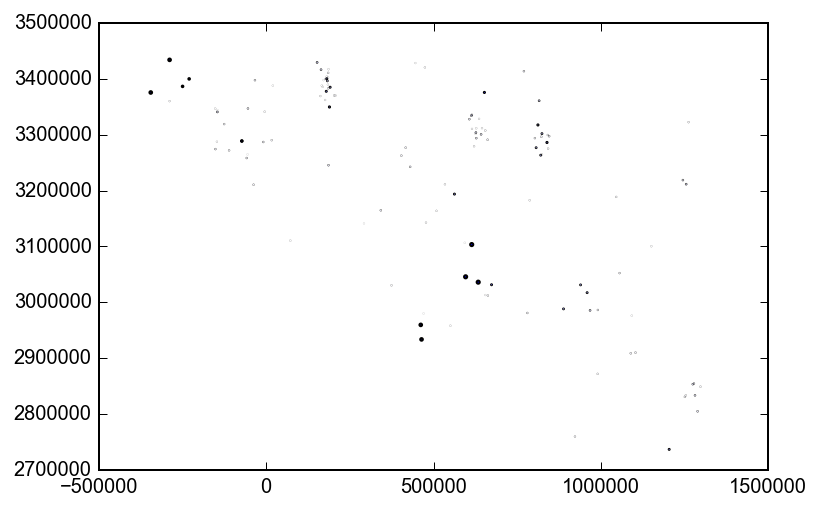

In [52]:
plt.scatter(eqs.east, eqs.north, s=eqs.slip_m)

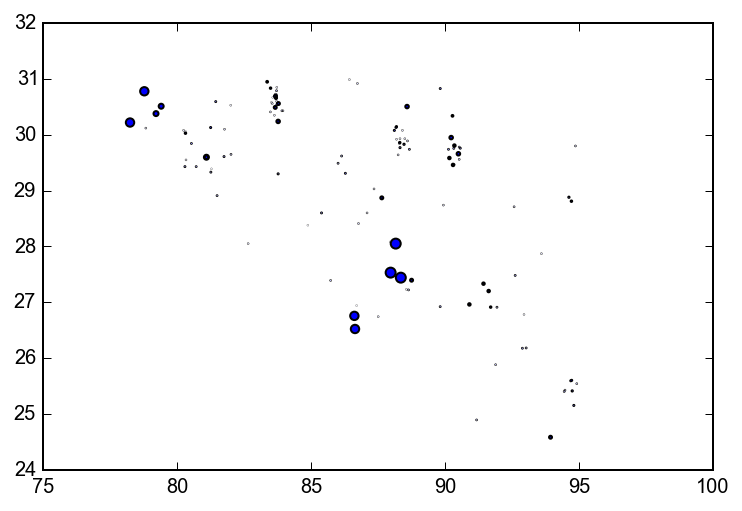

In [53]:
plt.scatter(eq_df.LON, eq_df.LAT, s=eqs.slip_m*10)